## This notebook creates the zone panels used in Figure 1.
There is a panel for each zone. The panels show the proportions of fish sampled each year. There is a bar plot for each of farm and wild.

In [1]:
import pandas as pd
import seaborn as sns
from pathlib import Path

In [2]:
# define the paths
DATA_DIR = Path('..') / 'source_data'

wild_fish_filepath = DATA_DIR / 'all_wild_fish_lice.csv'
wild_events_filepath = DATA_DIR / 'all_wild_sample_events.csv'

farm_details_filepath = DATA_DIR / 'industry_farm_details.csv'
farm_events_filepath = DATA_DIR / 'industry_farm_abundance.csv'

chart_output_dirpath = Path('..') / 'output' / 'Figure_1'

# Get a dataframe in the right format
1. There is a chart for each zone, so we need a zone column
2. Farm and wild are separated, so there needs to be a type column ('farm' or 'wild')
3. The x-axis is year, so we need a year column
4. Y-axis is that year's proportion of the total data, so we need:
    * the total events for each zone for each of farm and wild
    * number of events for each year, zone, farm|wild

## Get farm data in the right format

In [3]:
farm_details_df = pd.read_csv(farm_details_filepath)
farm_events_df = pd.read_csv(farm_events_filepath)
farm_df = pd.merge(farm_details_df, farm_events_df, on='facility_id', how='left')

# make sure we only use 2004 - 2023
farm_df = farm_df[farm_df.year.isin(range(2004, 2024))]

farm_df.head()

,facility_id,name,dfozone,latitude,longitude,company,region_name,year,month,fishselected,chalimus_ab,lep_motile_ab,lep_af_ab,cal_motile_ab,weight
0,1,Ahlstrom,3_1,49.778527,-124.154337,Grieg,Jervis and Sechelt Inlet,2005,4,0,NaN,NaN,NaN,NaN,0.162
1,1,Ahlstrom,3_1,49.778527,-124.154337,Grieg,Jervis and Sechelt Inlet,2009,5,120,0.000,0.017,0.008,0.000,1.000
2,1,Ahlstrom,3_1,49.778527,-124.154337,Grieg,Jervis and Sechelt Inlet,2009,6,40,0.000,0.000,0.000,0.000,0.479
3,1,Ahlstrom,3_1,49.778527,-124.154337,Grieg,Jervis and Sechelt Inlet,2010,11,60,0.017,0.533,0.183,0.017,0.477
4,1,Ahlstrom,3_1,49.778527,-124.154337,Grieg,Jervis and Sechelt Inlet,2010,12,62,0.016,0.629,0.306,0.000,0.330


In [4]:
# group by zone/year and get the number of sampling events
farm_zone_year_group = farm_df.groupby(['dfozone', 'year'])
farm_zone_year_event_df = farm_zone_year_group['fishselected'].agg('count').reset_index()
farm_zone_year_event_df.head()

,dfozone,year,fishselected
0,2_3,2004,8
1,2_3,2005,58
2,2_3,2006,67
3,2_3,2007,85
4,2_3,2008,61


In [5]:
# get the number of sampling events for each zone over all years
total_event_group = farm_zone_year_event_df.groupby(['dfozone'])
total_event_df = total_event_group['fishselected'].agg('sum').reset_index()
total_event_df.rename(columns={'fishselected': 'total'}, inplace=True)
total_event_df.head()

,dfozone,total
0,2_3,1661
1,2_4,1583
2,3_1,563
3,3_2,1804
4,3_3,2777


In [6]:
# merge together and create a proportion column
farm_chart_df = pd.merge(farm_zone_year_event_df, total_event_df, on='dfozone', how='left')
farm_chart_df['proportion'] = farm_chart_df.fishselected / farm_chart_df.total
farm_chart_df.head()

,dfozone,year,fishselected,total,proportion
0,2_3,2004,8,1661,0.004816
1,2_3,2005,58,1661,0.034919
2,2_3,2006,67,1661,0.040337
3,2_3,2007,85,1661,0.051174
4,2_3,2008,61,1661,0.036725


In [7]:
# label as farm
farm_chart_df['type'] = 'Farm Events'
# reindex to be in the right format for charting
farm_chart_df = farm_chart_df.reindex(columns=['dfozone', 'year', 'proportion', 'type', 'total'])
farm_chart_df.head()

,dfozone,year,proportion,type,total
0,2_3,2004,0.004816,Farm Events,1661
1,2_3,2005,0.034919,Farm Events,1661
2,2_3,2006,0.040337,Farm Events,1661
3,2_3,2007,0.051174,Farm Events,1661
4,2_3,2008,0.036725,Farm Events,1661


## Get wild data in the right format

In [8]:
wild_events_df = pd.read_csv(wild_events_filepath, parse_dates=['sampledate'])
wild_fish_df = pd.read_csv(wild_fish_filepath)
wild_df = pd.merge(wild_events_df, wild_fish_df, on='event_id', how='right')
wild_df.head()

,event_id,sampledate,region,dfozone,sample_site,latitude,longitude,source,fish_id,length,...,lep_motile,lep_unknown,cal_cop,cal_chal,cal_motile,cal_unknown,unknown_cop,unknown_chal,unknown_motile,unknown_unknown
0,5666.0,2017-05-15,Broughton Archipelago,3_3,Swanson Island Fish Farm,50.61806666666666,-126.70123333333332,Mainstream Biological Consulting,1,44.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5666.0,2017-05-15,Broughton Archipelago,3_3,Swanson Island Fish Farm,50.61806666666666,-126.70123333333332,Mainstream Biological Consulting,2,39.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5666.0,2017-05-15,Broughton Archipelago,3_3,Swanson Island Fish Farm,50.61806666666666,-126.70123333333332,Mainstream Biological Consulting,3,45.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5666.0,2017-05-15,Broughton Archipelago,3_3,Swanson Island Fish Farm,50.61806666666666,-126.70123333333332,Mainstream Biological Consulting,4,43.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5666.0,2017-05-15,Broughton Archipelago,3_3,Swanson Island Fish Farm,50.61806666666666,-126.70123333333332,Mainstream Biological Consulting,5,38.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
# make a year column
wild_df['year'] = wild_df.sampledate.dt.year

# make sure we only use 2004 - 2023
wild_df = wild_df[wild_df.year.isin(range(2004, 2024))]

In [10]:
# group by zone/year and count the fish sampled
wild_zone_year_group = wild_df.groupby(['dfozone', 'year'])
wild_zone_year_fish_df = wild_zone_year_group['fish_id'].agg('count').reset_index()
wild_zone_year_fish_df.head()

,dfozone,year,fish_id
0,2_3,2004,2412
1,2_3,2005,1312
2,2_3,2006,1557
3,2_3,2007,1176
4,2_3,2008,2198


In [11]:
# get the total fish per zone over all years
wild_total_fish_group = wild_zone_year_fish_df.groupby(['dfozone'])
wild_total_fish_df = wild_total_fish_group['fish_id'].agg('sum').reset_index()
wild_total_fish_df.rename(columns={'fish_id': 'total'}, inplace=True)
wild_total_fish_df.head()

,dfozone,total
0,2_3,21477
1,2_4,37596
2,3_1,6640
3,3_2,8090
4,3_3,207333


In [12]:
# merge together and create a proportion column
wild_chart_df = pd.merge(wild_zone_year_fish_df, wild_total_fish_df, on='dfozone', how='left')
wild_chart_df['proportion'] = wild_chart_df.fish_id / wild_chart_df.total
wild_chart_df.head()

,dfozone,year,fish_id,total,proportion
0,2_3,2004,2412,21477,0.112306
1,2_3,2005,1312,21477,0.061089
2,2_3,2006,1557,21477,0.072496
3,2_3,2007,1176,21477,0.054756
4,2_3,2008,2198,21477,0.102342


In [13]:
# label as farm
wild_chart_df['type'] = 'Wild Fish'
# reindex to be in the right format for charting
wild_chart_df = wild_chart_df.reindex(columns=['dfozone', 'year', 'proportion', 'type', 'total'])
wild_chart_df.head()

,dfozone,year,proportion,type,total
0,2_3,2004,0.112306,Wild Fish,21477
1,2_3,2005,0.061089,Wild Fish,21477
2,2_3,2006,0.072496,Wild Fish,21477
3,2_3,2007,0.054756,Wild Fish,21477
4,2_3,2008,0.102342,Wild Fish,21477


## Combine the Dataframes ready for charting

In [14]:
chart_df = pd.concat([farm_chart_df, wild_chart_df])

chart_df.head()

,dfozone,year,proportion,type,total
0,2_3,2004,0.004816,Farm Events,1661
1,2_3,2005,0.034919,Farm Events,1661
2,2_3,2006,0.040337,Farm Events,1661
3,2_3,2007,0.051174,Farm Events,1661
4,2_3,2008,0.036725,Farm Events,1661


# Create charts for each zone

In [15]:
# slightly hacky solution to get nice titles in the charts - adjust type column to include the total N
chart_df.type = chart_df.apply(lambda x: "{} (N={:,})".format(x.type, x.total), axis=1)
chart_df.head()

,dfozone,year,proportion,type,total
0,2_3,2004,0.004816,"Farm Events (N=1,661)",1661
1,2_3,2005,0.034919,"Farm Events (N=1,661)",1661
2,2_3,2006,0.040337,"Farm Events (N=1,661)",1661
3,2_3,2007,0.051174,"Farm Events (N=1,661)",1661
4,2_3,2008,0.036725,"Farm Events (N=1,661)",1661


In [16]:
# configure seaborn
sns.set_style('whitegrid')
sns.set(rc={"figure.figsize": (15, 15)})
sns.set_context("paper")
sns.set_palette('colorblind')

sns.set(font_scale=1.4)

In [17]:
def chart_zone(zone_str):
    chart_zone_df = chart_df[chart_df.dfozone == zone_str]

    # FacetGrid
    facet_grid = sns.FacetGrid(chart_zone_df, row='type', aspect=3, height=2, hue='type', palette='gray', sharey=False)
    facet_grid.map(sns.barplot, 'year', 'proportion', order=list(range(2004, 2024)))

    facet_grid.set(xticks=[1, 6, 11, 16], yticks=[0, 0.1])
    facet_grid.set_axis_labels(x_var="", y_var="")

    facet_grid.set_titles("{row_name}")

    # set the y-axis for the farm charts
    print(facet_grid.axes_dict)
    for ax_name, ax in facet_grid.axes_dict.items():
        if ax_name.startswith('Farm'):
            ax.set_ylim((0, .18))

    return facet_grid

{'Farm Events (N=1,661)': <AxesSubplot:title={'center':'Farm Events (N=1,661)'}>, 'Wild Fish (N=21,477)': <AxesSubplot:title={'center':'Wild Fish (N=21,477)'}>}
{'Farm Events (N=1,583)': <AxesSubplot:title={'center':'Farm Events (N=1,583)'}>, 'Wild Fish (N=37,596)': <AxesSubplot:title={'center':'Wild Fish (N=37,596)'}>}
{'Farm Events (N=563)': <AxesSubplot:title={'center':'Farm Events (N=563)'}>, 'Wild Fish (N=6,640)': <AxesSubplot:title={'center':'Wild Fish (N=6,640)'}>}
{'Farm Events (N=1,804)': <AxesSubplot:title={'center':'Farm Events (N=1,804)'}>, 'Wild Fish (N=8,090)': <AxesSubplot:title={'center':'Wild Fish (N=8,090)'}>}
{'Farm Events (N=2,777)': <AxesSubplot:title={'center':'Farm Events (N=2,777)'}>, 'Wild Fish (N=207,333)': <AxesSubplot:title={'center':'Wild Fish (N=207,333)'}>}
{'Farm Events (N=1,019)': <AxesSubplot:title={'center':'Farm Events (N=1,019)'}>, 'Wild Fish (N=7,129)': <AxesSubplot:title={'center':'Wild Fish (N=7,129)'}>}
{'Farm Events (N=707)': <AxesSubplot:title

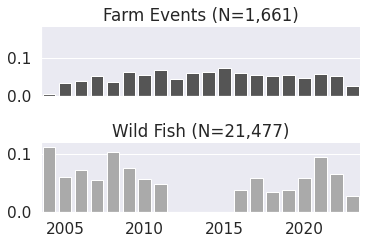

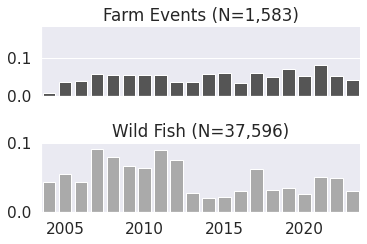

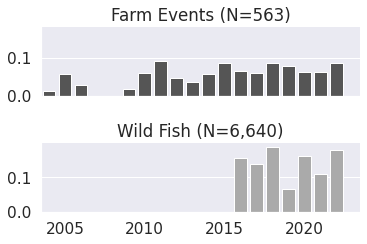

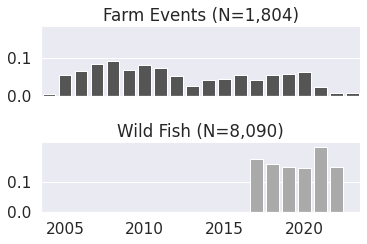

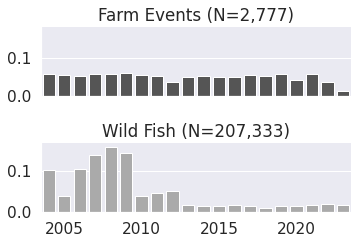

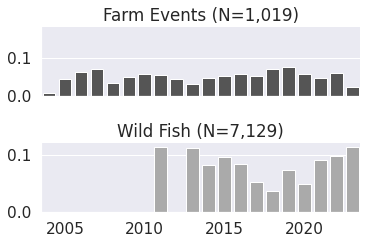

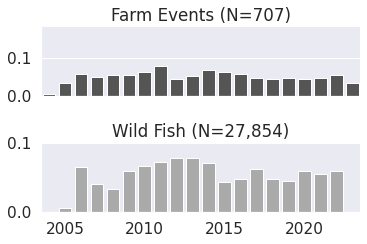

In [18]:
# create them all and save them
for zone_str in chart_df.dfozone.unique():
    zone_chart = chart_zone(zone_str)
    # save the figure
    zone_chart.savefig(chart_output_dirpath / 'zone_{}_panel.png'.format(zone_str))